<a href="https://colab.research.google.com/github/ayushjain1144/Active-Learning/blob/master/ML_ass_2_pool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://modal-python.readthedocs.io/en/latest/content/examples/pool-based_sampling.html

https://modal-python.readthedocs.io/en/latest/content/examples/stream-based_sampling.html

https://github.com/modAL-python/modAL

https://github.com/ntucllab/libact

In [1]:
!pip install modAL

In [0]:

import numpy as np
from sklearn import datasets
from sklearn import decomposition
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


### Set random seed for uniformity

In [0]:
rnd_seed = 452
np.random.seed(rnd_seed)

### Dataset and its preprocessing

In [0]:
irs = datasets.load_iris()
x_pre = irs['data']
y_pre = irs['target']

In [0]:
pca = decomposition.PCA(n_components=2, random_state=rnd_seed)
irs_trns = pca.fit_transform(X=x_pre)

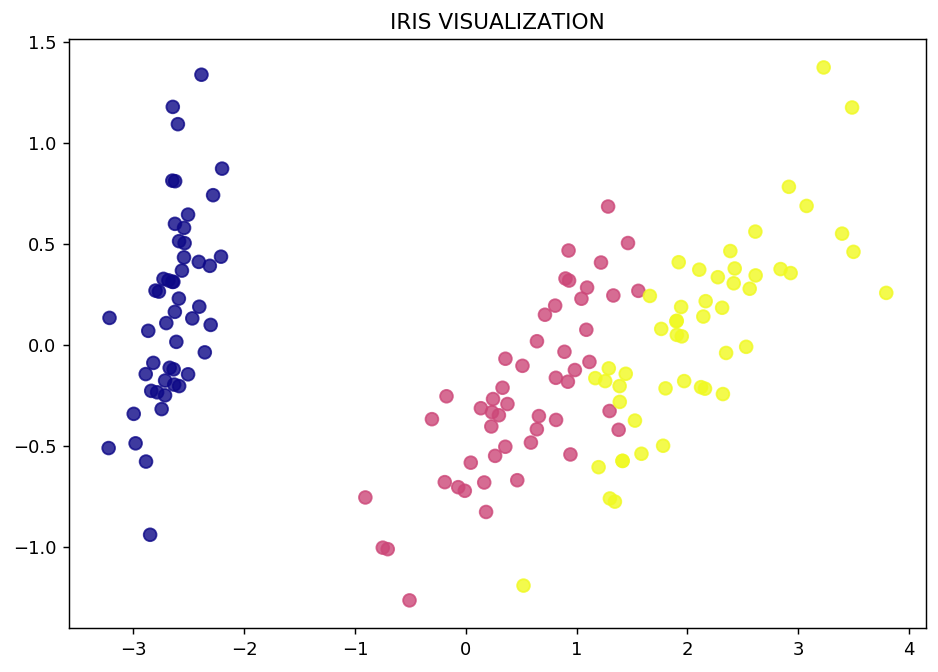

In [6]:
x_c, y_c = irs_trns[:,0], irs_trns[:,1]

plt.figure(figsize=(8.5, 6), dpi=130)
plt.scatter(x=x_c, y=y_c, c=y_pre, cmap='plasma', s=50, alpha=8/10)
plt.title('IRIS VISUALIZATION')
plt.show()

### Isolating examples from the training dataset

In [0]:
dataset_size = x_pre.shape

In [0]:
idx_training = np.random.randint(low=0,high=dataset_size[0], size=3)
x_train = x_pre[idx_training]
y_train = y_pre[idx_training]

x_pool = np.delete(x_pre, idx_training, axis=0)
y_pool = np.delete(y_pre, idx_training, axis=0)

## Active learning with pool-based sampling

In [0]:
knn = KNeighborsClassifier(n_neighbors=3)
learner = ActiveLearner(estimator=knn, query_strategy=uncertainty_sampling, X_training=x_train, y_training=y_train)

In [10]:
# Evaluating the model's performance on the initial dataset

pred_initial = learner.predict(x_pre)
is_correct_pred = (pred_initial == y_pre)

pred_initial

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

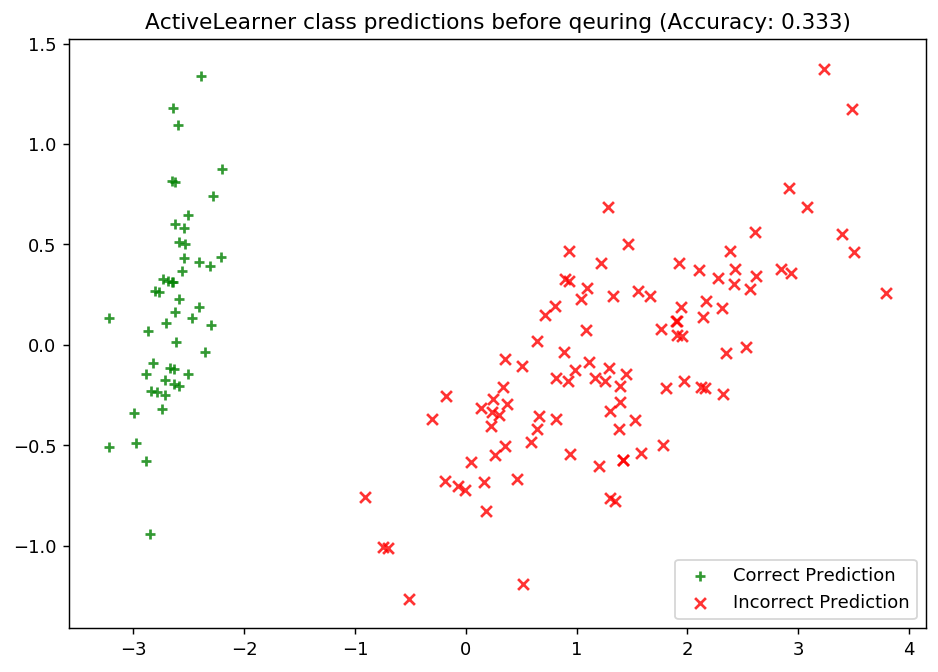

In [11]:
score_before_querying = learner.score(x_pre, y_pre)

# Plot the results

fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)
ax.scatter(x=x_c[is_correct_pred],  y=y_c[is_correct_pred],  c='g', marker='+', label='Correct Prediction',   alpha=8/10)
ax.scatter(x=x_c[~is_correct_pred], y=y_c[~is_correct_pred], c='r', marker='x', label='Incorrect Prediction', alpha=8/10)
ax.legend(loc='lower right')
ax.set_title("ActiveLearner class predictions before qeuring (Accuracy: {score:.3f})".format(score=score_before_querying))
plt.show()

### Querying unseen instances

We tune our classifier by allowing it to query 20 instances it has not seen before.

In [12]:
num_of_queries = 20


past_performances = [score_before_querying]

# Allow our model to query the unlabeled dataset for the most informative
# points according to the querying strategy (uncertainty sampling).

for idx in range(num_of_queries):
  query_idx, _ = learner.query(x_pool)

  # Teach the ActiveLeaner model
  x,y = x_pool[query_idx].reshape(1,-1), y_pool[query_idx].reshape(1,)

  learner.teach(X=x,y=y)

  x_pool, y_pool = np.delete(x_pool, query_idx, axis=0), np.delete(y_pool, query_idx)

  accuracy = learner.score(x_pre,y_pre)

  print('Accuracy after query {n}: {acc:0.4f}'.format(n=idx + 1, acc=accuracy))

  past_performances.append(accuracy)


Accuracy after query 1: 0.3333
Accuracy after query 2: 0.6400
Accuracy after query 3: 0.6667
Accuracy after query 4: 0.6667
Accuracy after query 5: 0.6667
Accuracy after query 6: 0.6667
Accuracy after query 7: 0.6667
Accuracy after query 8: 0.6667
Accuracy after query 9: 0.6667
Accuracy after query 10: 0.6667
Accuracy after query 11: 0.6667
Accuracy after query 12: 0.6667
Accuracy after query 13: 0.6667
Accuracy after query 14: 0.6667
Accuracy after query 15: 0.7267
Accuracy after query 16: 0.7800
Accuracy after query 17: 0.8867
Accuracy after query 18: 0.9333
Accuracy after query 19: 0.9333
Accuracy after query 20: 0.9333


### Plot and evaluate the model

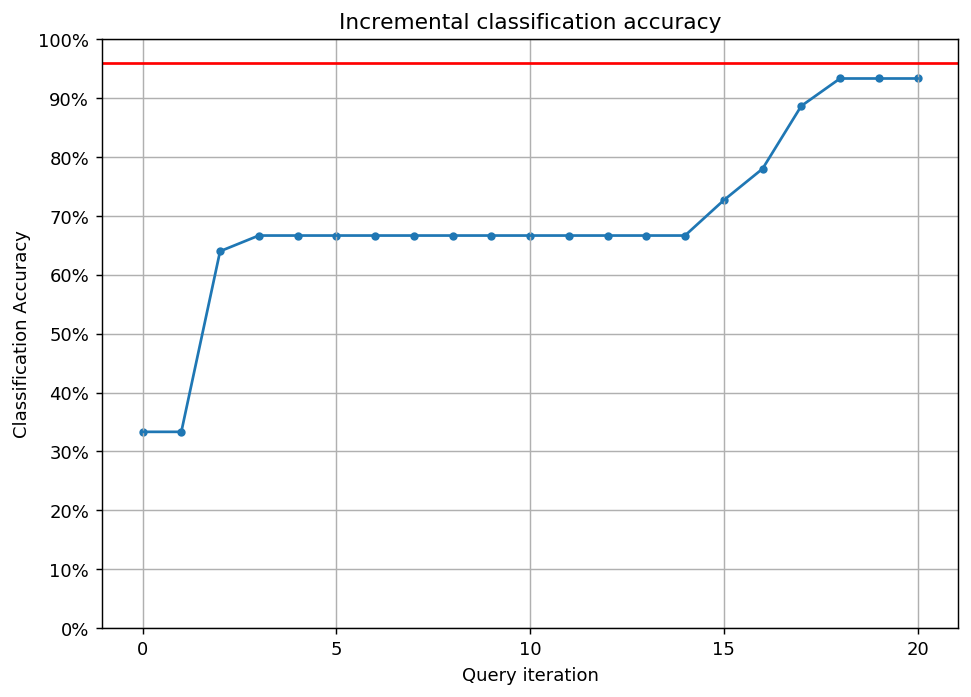

In [14]:
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.plot(past_performances)
ax.scatter(range(len(past_performances)), past_performances, s=13)

ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=5, integer=True))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=10))
ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))

ax.set_ylim(bottom=0, top=1)
ax.grid(True)
plt.axhline(y=0.96, color = 'red')

ax.set_title('Incremental classification accuracy')
ax.set_xlabel('Query iteration')
ax.set_ylabel('Classification Accuracy')

plt.show()

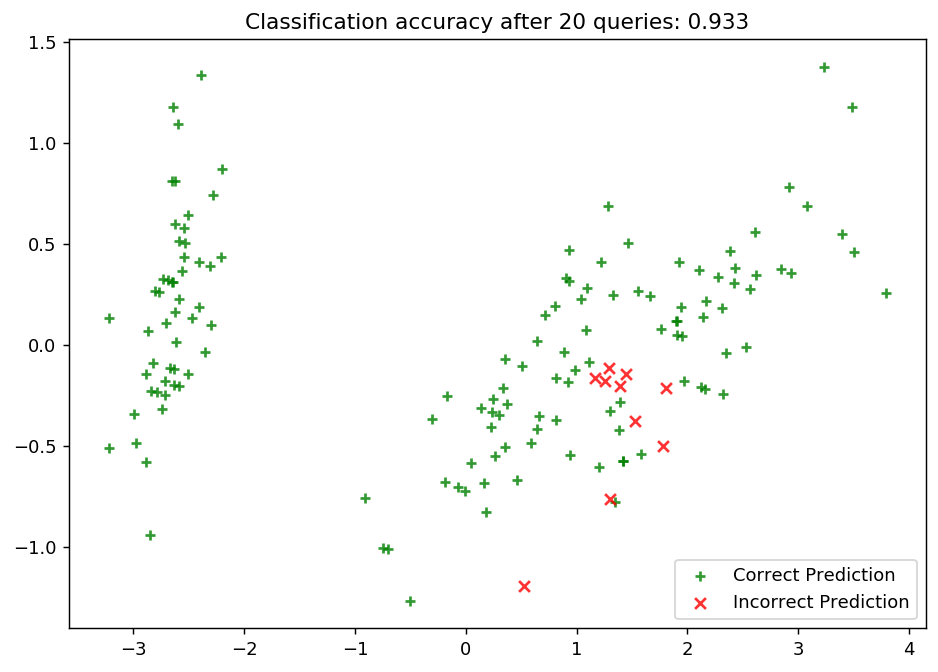

In [15]:
# Isolate the data we'll need for plotting.
predictions = learner.predict(x_pre)
is_correct = (predictions == y_pre)

# Plot our updated classification results once we've trained our learner.
fig, ax = plt.subplots(figsize=(8.5, 6), dpi=130)

ax.scatter(x=x_c[is_correct],  y=y_c[is_correct],  c='g', marker='+', label='Correct Prediction',   alpha=8/10)
ax.scatter(x=x_c[~is_correct], y=y_c[~is_correct], c='r', marker='x', label='Incorrect Prediction', alpha=8/10)

ax.set_title('Classification accuracy after {n} queries: {final_acc:.3f}'.format(n=num_of_queries, final_acc=past_performances[-1]))
ax.legend(loc='lower right')

plt.show()